In [19]:
# I have adopted the basic approach and bits of code from the following blogpost:
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [20]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
def base_model(optimizer):
    """Builds a basic model for benchmark."""
    
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, input_shape=(3, 150, 150)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(32, init='he_normal'))
    model.add(Activation('relu'))

    model.add(Dense(1, init='he_normal'))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    
    return model

In [22]:
def build_model(optimizer):
    """Builds model with desired hyperparameters."""
    
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, activation='relu', name='conv1', input_shape=(3, 150, 150)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Convolution2D(32, 3, 3, activation='relu', name='conv2'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv3'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    
    return model

In [23]:
def data_augmentation():
    """This function handles data augmentation and reading data from the directories."""
    
    # augmentation configuration used for training
    train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=20,
            width_shift_range=0.01,
            height_shift_range=0.1,
            shear_range=0.05,
            zoom_range=0.1,
            horizontal_flip=False,
            fill_mode='nearest')

    # augmentation configuration used for testing
    test_datagen = ImageDataGenerator(rescale=1./255)

    # reading images from the specified directory and generating batches of augmented data
    train_generator = train_datagen.flow_from_directory(
            'data/train',
            target_size=(150, 150),
            batch_size=32,
            class_mode='binary')
    
    # reading images from the specified directory and generating batches of augmented data
    validation_generator = test_datagen.flow_from_directory(
            'data/validation',
            target_size=(150, 150),
            batch_size=32,
            class_mode='binary')
    
    return train_generator, validation_generator

In [24]:
def learning_curves(optimizer, history):
    """Display and save learning curves."""
    
    # accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('accuracy of the model')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training set', 'validation set'], loc='lower right')
    plt.savefig(str(optimizer)+'_accuracy.png')
    plt.show()

    # loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('loss of the model')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training set', 'validation set'], loc='upper right')
    plt.savefig(str(optimizer)+'_loss.png')
    plt.show()

In [27]:
def run_model(optimizer, nb_epoch):
    """This function builds the model"""
    
    train_generator, validation_generator  = data_augmentation()
    model = build_model(optimizer)
    #model = base_model(optimizer)    
    
    history = model.fit_generator(
                    train_generator,
                    samples_per_epoch=340,
                    nb_epoch=nb_epoch,
                    validation_data=validation_generator,
                    nb_val_samples=60,
                    verbose=1)
    
    learning_curves(optimizer, history)
    model.save_weights(str(optimizer)+'.h5')
    
    return model

Found 680 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Epoch 1/2
320/340 [===========================>..] - ETA: 5s - loss: 0.7391 - acc: 0.5219 

C:\Users\bfeher\AppData\Local\Continuum\Anaconda2\lib\site-packages\keras\engine\training.py:1403: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


352/340 [===============================] - 100s - loss: 0.7341 - acc: 0.5256 - val_loss: 0.6877 - val_acc: 0.5000
Epoch 2/2
360/340 [===============================] - 103s - loss: 0.6848 - acc: 0.5639 - val_loss: 0.6165 - val_acc: 0.8523


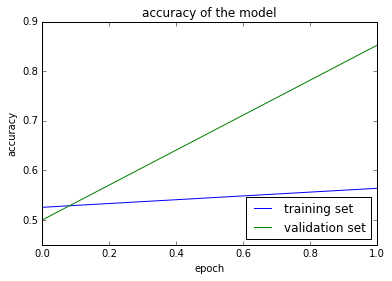

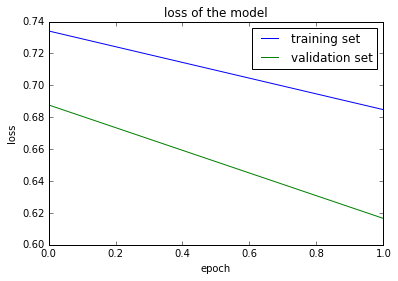

[WARNING] adam.h5 already exists - overwrite? [y/n]n
Found 680 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Epoch 1/2
352/340 [===============================] - 100s - loss: 0.8755 - acc: 0.5597 - val_loss: 0.6570 - val_acc: 0.7500
Epoch 2/2
360/340 [===============================] - 102s - loss: 0.6661 - acc: 0.6444 - val_loss: 0.5990 - val_acc: 0.6477


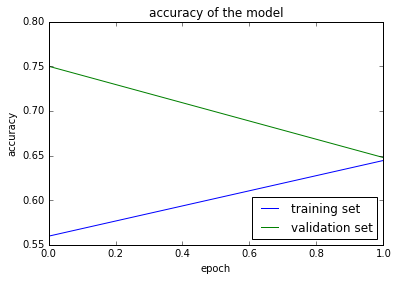

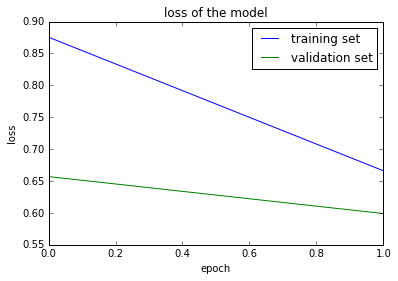

[WARNING] rmsprop.h5 already exists - overwrite? [y/n]n


In [28]:
optimizer_list = ['adam', 'rmsprop']
for optimizer in optimizer_list:
    model = run_model(optimizer, 2)

# Filter visualization

In [ ]:
# For visualizing the filters I have adopted and modified the code from the following blogposts:
# https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html

In [35]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', name='conv1', input_shape=(3, 150, 150)))
first_layer = model.layers[-1]
input_img = first_layer.input

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, 3, 3, activation='relu', name='conv2'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3, activation='relu', name='conv3'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [57]:
import h5py
model.load_weights('filter_vis.h5')

In [43]:
from keras import backend as K

layer_name = 'conv2'
filter_index = 0

# build a loss function that maximizes the activation
# of the nth filter of the layer considered
layer_output = layer_dict[layer_name].output
loss = K.mean(layer_output[:, filter_index, :, :])

# compute the gradient of the input picture wrt this loss
grads = K.gradients(loss, input_img)[0]

# normalization trick: we normalize the gradient
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

# this function returns the loss and grads given the input picture
iterate = K.function([input_img], [loss, grads])

import numpy as np

# we start from a gray image with some noise
input_img_data = np.random.random((1, 3, img_width, img_height)) * 20 + 128.
# run gradient ascent for 20 steps
step = 1
for i in range(20):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step
    
from scipy.misc import imsave

# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

img = input_img_data[0]
img = deprocess_image(img)
imsave('%s_filter_%d.png' % (layer_name, filter_index), img)

### Draw output for all filters

In [52]:
layer_list = ['conv1', 'conv2', 'conv3']
filter_list = [31,31,63]
n = 0
for layer_name in layer_list:
    n += 1
    layer_name = layer_name
    for filter_index in range(filter_list[n]):

        filter_index = filter_index

        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        layer_output = layer_dict[layer_name].output
        loss = K.mean(layer_output[:, filter_index, :, :])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, input_img)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([input_img], [loss, grads])
        
        # we start from a gray image with some noise
        input_img_data = np.random.random((1, 3, img_width, img_height)) * 20 + 128.
        # run gradient ascent for 20 steps
        step = 1
        for i in range(20):
            loss_value, grads_value = iterate([input_img_data])
            input_img_data += grads_value * step
        
        img = input_img_data[0]
        img = deprocess_image(img)
        imsave('filters/%s_filter_%d.png' % (layer_name, filter_index), img)